## RNN in Python

Next we will see how we can implement ANN (Artificial Neural Networks) in Python. For this, we will use the `keras` library over `tensorflow` (which is the most common).

### Classification of textual data sets

We are going to use the Pima Indian diabetes onset dataset. This is a standard Machine Learning dataset from the UCI Machine Learning repository. It describes the medical record data of Pima Indian patients and whether they had an onset of diabetes within five years.

#### Step 1. Reading the processed data set

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean-pima-indians-diabetes.csv")

X = total_data.drop("8", axis = 1) #total_data.drop(columns=['8'])
y = total_data["8"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,0,1,2,3,4,5,6,7
60,-0.547919,-1.154694,-3.572597,-1.288212,-0.692891,-4.060474,-0.507006,-1.041549
618,1.530847,-0.278373,0.666618,0.217261,-0.692891,-0.481351,2.446670,1.425995
346,-0.844885,0.566649,-1.194501,-0.096379,0.027790,-0.417892,0.550035,-0.956462
294,-1.141852,1.255187,-0.987710,-1.288212,-0.692891,-1.280942,-0.658012,2.702312
231,0.639947,0.410164,0.563223,1.032726,2.519781,1.803195,-0.706334,1.085644


In [19]:
total_data.head()

,0,1,2,3,4,5,6,7,8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       614 non-null    float64
 1   1       614 non-null    float64
 2   2       614 non-null    float64
 3   3       614 non-null    float64
 4   4       614 non-null    float64
 5   5       614 non-null    float64
 6   6       614 non-null    float64
 7   7       614 non-null    float64
dtypes: float64(8)
memory usage: 43.2 KB


In [21]:
X_train.describe()

,0,1,2,3,4,5,6,7
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,-0.030404,-0.001236,0.016018,-0.008621,0.014228,-0.001166,-0.008180,-0.028395
std,0.983928,1.002606,0.957060,0.968143,1.009255,0.982434,1.017317,0.978802
min,-1.141852,-3.783654,-3.572597,-1.288212,-0.692891,-4.060474,-1.189553,-1.041549
25%,-0.844885,-0.653939,-0.263941,-1.288212,-0.692891,-0.620962,-0.695764,-0.786286
50%,-0.250952,-0.121888,0.149641,0.154533,-0.323867,0.000942,-0.300128,-0.360847
75%,0.639947,0.566649,0.563223,0.719086,0.433715,0.556214,0.428475,0.575118
max,3.906578,2.444478,2.734528,2.663656,6.652839,4.455807,5.883565,4.063716


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='2', ylabel='Count'>

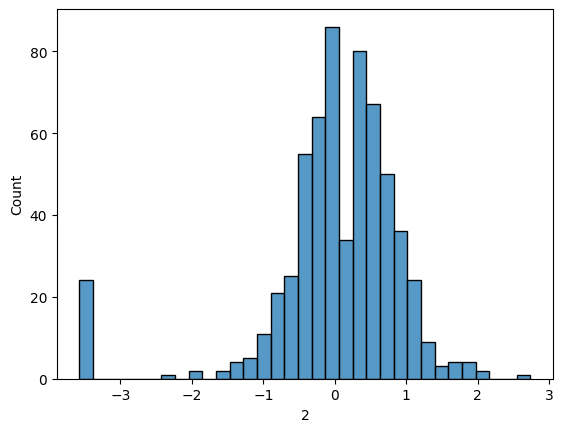

In [52]:
sns.histplot(X_train['2'])

The *train* set will be used to train the model, while the *test* set will be used to evaluate the effectiveness of the model. In addition, it is generally a good practice to normalize the data before training an artificial neural network (ANN). Two types can be applied: from 0 to 1 or from -1 to 1.

#### Step 2: Model initialization and training

Models in Keras are defined as a sequence of layers. We create a sequential model and add layers one by one until we are satisfied with our network architecture.

The input layer will always have as many neurons as predictor variables. In this case, we have a total of 8 (from 0 to 7). Next, we add two hidden layers, one of 12 neurons and one of 8. Finally, the fourth layer, the output layer, will have a single neuron since the problem is dichotomous. If it were of `n` classes, the network would have `n` outputs.

> Note: We have created a default network with random hidden layers and neurons in each hidden layer. Normally you would start this way and then do a hyperparameter optimization.

In [36]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import set_random_seed

#set_random_seed(42)
#
#model = Sequential()
#model.add(Dense(12, input_shape = (8,), activation = "relu"))
#model.add(Dense(8, activation = "relu"))
#model.add(Dense(1, activation = "sigmoid"))

In [39]:

model = Sequential()

model.add(Dense(12, input_shape=(8,), activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Then, once the model is defined, we can compile it. The backend automatically chooses the best way to represent the network to train and make predictions to run on your hardware, such as CPU, GPU, or evenly distributed.

When compiling, we must specify some additional properties required when training the network. Recall that training a network means finding the best set of weights to map inputs to outputs in our dataset.

In [40]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model

<Sequential name=sequential_6, built=True>

We will define the optimizer known as `adam`. This is a popular version of gradient descent because it is automatically tuned and gives good results on a wide range of problems. We will collect and report the classification accuracy, defined through the argument of the metrics.

Training occurs in **epochs**, and each epoch is divided into **batches**.

- **Epoch**: One pass through all rows of the training data set.
- **Batch**: One or more samples considered by the model within an epoch before the weights are updated.

The training process will run for a fixed number of iterations, which are the epochs. We must also set the number of rows in the data set that are considered before the model weights are updated within each epoch, which is called the batch size and is set by the `batch_size` argument.

For this problem, we will run a small number of epochs (150) and use a relatively small batch size of 10:

In [42]:
# Fit the keras model on the data set
model.fit(X_train, y_train, epochs = 150, batch_size = 10)

Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3441 - loss: 0.9932
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4074 - loss: 0.7971
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5810 - loss: 0.6740
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7379 - loss: 0.5996
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7498 - loss: 0.5559
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7457 - loss: 0.5300
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7474 - loss: 0.5131
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7423 - loss: 0.5015
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7426 - loss: 0.4933
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7535 - loss: 0.4871
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7546 - loss: 0.4824
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [43]:
_, accuracy = model.evaluate(X_train, y_train)

print(f"Accuracy: {accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8291 - loss: 0.3842  
Accuracy: 0.8192182183265686


The training time of a model will depend, first of all, on the size of the dataset (instances and features), and also on the type of model and its configuration.

The accuracy of the training set is `84.20%`.

#### Step 3: Model prediction

In [53]:
y_pred = model.predict(X_test)
y_pred[:15]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[0.6120229 ],
       [0.05251433],
       [0.0839982 ],
       [0.2582637 ],
       [0.52721417],
       [0.58907276],
       [0.00336364],
       [0.28946045],
       [0.79263407],
       [0.6303486 ],
       [0.21037184],
       [0.7803591 ],
       [0.44665188],
       [0.6132053 ],
       [0.06440801]], dtype=float32)

<Axes: >

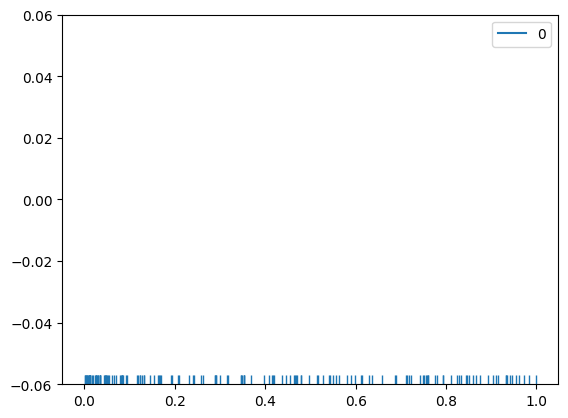

In [50]:
sns.rugplot(y_pred)


As we can see, the model does not return the classes `0` and `1` directly, but requires a previous preprocessing:

In [54]:
y_pred_round = [round(x[0]) for x in y_pred]
y_pred_round[:15]

[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]

With raw data, it is very difficult to know whether the model is getting it right or not. To do this, we must compare it with reality. There are many metrics to measure the effectiveness of a model in predicting, including **accuracy**, which is the fraction of predictions that the model makes correctly.

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_round)

0.7272727272727273

#### Step 4: Saving the model

Once we have the model we were looking for (presumably after hyperparameter optimization), to be able to use it in the future it is necessary to store it in our directory.

In [ ]:
model.save("keras_8-12-8-1_42.keras")

Adding an explanatory name to the model is vital, since in the case of losing the code that has generated it we will know what architecture it has (in this case we say `8-12-8-1` because it has 8 neurons in the input layer, 12 and 8 in the two hidden layers and one neuron in the output layer) and also the seed to replicate the random components of the model, which in this case we do by adding a number to the file name, `42`.

### Image set classification

The following is a simple example of how to train a neural network to classify images from the MNIST dataset. MNIST is a dataset of images of handwritten digits, from 0 to 9.

#### Step 1. Reading the data set

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data (transform pixel values from 0-255 to 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

The pixel values of the images are normalized to be in the range 0 to 1 instead of 0 to 255.

#### Step 2: Model initialization and training

The architecture of the neural network is defined. In this case, we are using a simple sequential model with a flattening layer that transforms 2D images into 1D vectors, a dense layer with 128 neurons, and an output layer with 10 neurons.

An alternative way to create an ANN to the above is provided below. Both are valid:

In [ ]:
from tensorflow.keras.layers import Flatten

set_random_seed(42)

model = Sequential([
  # Layer that flattens the 28x28 pixel input image to a vector of 784 elements
  Flatten(input_shape = (28, 28)),
  # Dense hidden layer with 128 neurons and ReLU activation function
  Dense(128, activation = "relu"),
  # Output layer with 10 neurons (one for each digit from 0 to 9)
  Dense(10)
])

We also added the network compiler to define the optimizer and the loss function, as we did before:

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer = "adam", loss = SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"])

The model is trained on the training set for a certain number of epochs. When working with images, it is less common to use the `batch_size` parameter:

In [ ]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2530 - accuracy: 0.9276
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1111 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0759 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0566 - accuracy: 0.9831
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0432 - accuracy: 0.9865


In [ ]:
_, accuracy = model.evaluate(X_train, y_train)

print(f"Accuracy: {accuracy}")

1875/1875 [==============================] - 1s 669us/step - loss: 0.0441 - accuracy: 0.9858
Accuracy: 0.9858166575431824


The training time of a model will depend, first of all, on the size of the dataset (instances and features), and also on the type of model and its configuration.

#### Step 3: Model prediction

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0841 - accuracy: 0.9751 - 271ms/epoch - 867us/step

Test accuracy: 0.9750999808311462


#### Step 4: Saving the model

Once we have the model we were looking for (presumably after hyperparameter optimization), to be able to use it in the future, it is necessary to store it in our directory.

In [ ]:
model.save("keras_28x28-128-10_42.keras")

Adding an explanatory name to the model is vital, since in the case of losing the code that has generated it we will know what architecture it has (in this case we say `28x28-128-10` because it has an input layer of 28 x 28 pixels, 128 neurons in the only hidden layer it has, and 10 neurons in the output layer) and also the seed to replicate the random components of the model, which in this case we do by adding a number to the file name, `42`.